<center><font size="6"> TP 3 : Applications de la décomposition en valeurs singulières </font> </center>

<font size="4"><b>Recalage rigide de nuages de points </b></font>

On considère deux ensembles ordonnés de points $A = x_1, \dots, x_N$ et $B = y_1, \dots, y_N$ de l’espace Euclidien $\mathbb{R}^d$. Recaler $A$ sur $B$ revient à trouver la matrice orthogonale $R$ solution du problème d’optimisation :
\begin{equation}
\min_{R\in O(\mathbb{R}^d)}\sum_{i=1}^N \Vert Rx_i - y_i\Vert_2,  \qquad \qquad \qquad (1)
\end{equation}
où le minimum est pris sur l’ensemble des matrices orthogonales de dimension $d$.\\
Pour résoudre ce problème, on utilisera la décomposition en valeurs singulières.\\
On note $X$ la matrice de taille $d \times N$ dont les colonnes sont les vecteurs $x_i$ et $Y$ la matrice de taille $d \times N$ dont les colonnes sont les vecteurs $y_i$. La résolution du problème (1) est équivalente à la résolution du problème suivant :
\begin{equation}
\max_{R\in O(\mathbb{R}^d)}Tr(RXY^T), \qquad \qquad \qquad \quad (2)
\end{equation}
où $Tr$ est la trace de la matrice.
On note $B = XY^T$ et on considère sa décomposition en valeurs singulières $B = U \Sigma V^T$. $R$ est solution de (2) si et seulement si la matrice orthogonale $M = V^TRU$ est solution de :
\begin{equation}
\max_{R\in O(\mathbb{R}^d)}Tr(M\Sigma), \qquad \qquad \qquad \qquad (3)
\end{equation}
En utilisant l’orthogonalité de $M$, on montre que $M$ maximise (3) si et seulement si $m_{ii} = 1$ pour tout $i \in \{1, \dots, d\}$ et $m_{ij} = 0$ pour $i\neq j$, c'est-à-dire si et seulement si $M = I_d$.
En conclusion, on a $R = V U^T$ est la solution unique du problème (1).


In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.image as img
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

Écrire une fonction <tt>recalage_orthogonal</tt> qui prend en entrée les matrices X et Y
et renvoie la matrice R solution du problème 1.

On utilisera la fonction <tt>la.svd</tt> en prenant bien garde à sa documentation. 

In [2]:
def recalage_orthogonal(X,Y):
    B=X@(Y.T)
    U,sig,VT = la.svd(B)
    return VT.T@U.T

Application numérique : on considère les matrices X et Y définies comme suit :

In [3]:
N = 1000
X = np.random.rand(3,3)
X

array([[0.2339481 , 0.86474491, 0.36870663],
       [0.82170049, 0.04730206, 0.33608948],
       [0.2467824 , 0.9664302 , 0.77816484]])

Créer une matrice __orthogonale et aléatoire__ P de dimension 3,3. Penser que la svd fournit deux matrices orthogonales dans sa décomposition appliquée à toute matrice.

In [4]:
P = la.svd(np.random.rand(3,3))[0]
P

array([[-0.5183622 , -0.50049338, -0.69340249],
       [-0.40448917, -0.57090849,  0.71445924],
       [-0.75345148,  0.65082246,  0.09349323]])

Créer le nuage Y en appliquant cette rotation aléatoire P au nuage de points X de départ. Ajouter une petit pertubation au nuage Y d'arrivée.

In [8]:
nuageY = P@X + 1e-12 * X
nuageY

array([[-0.70364503, -1.14205055, -0.89891558],
       [-0.38742929,  0.31368989,  0.21495289],
       [ 0.38158507, -0.53040342,  0.01368517]])

En utilisant votre fonction <tt>recalage_orthogonal</tt>, calculer le recalage
orthogonal R entre X et Y.

In [9]:
R = recalage_orthogonal(X,nuageY)
R

array([[-0.5183622 , -0.50049338, -0.69340249],
       [-0.40448917, -0.57090849,  0.71445924],
       [-0.75345148,  0.65082246,  0.09349323]])

Comparer le résultat R obtenu avec P, la matrice de rotation utilisée pour définir Y .
Vérifier le résultat obtenu, par exemple en regardant la norme de la différence. On
pourra aussi supprimer la petite perturbation et remplacer la ligne pour voir ce qui
se passe.

In [10]:
diff = la.norm(R - P)
diff

1.2469579141147407e-12

On va visualiser les effets des rotations et petites perturbations, on considère maintenant un plus petit ensemble de points. Les lignes ci-dessous permettent de visualiser les points X2 et Y2.

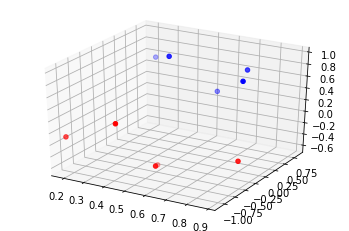

In [11]:
import numpy as np
import matplotlib.pyplot as plt
N2 = 5
X2 = np.random.rand(3,N2)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(X2[0,:], X2[1,:], X2[2,:], color = 'blue')

# Création d’une matrice orthogonale aléatoire P2
M2 = np.random.rand(3,3)
A2, S2, B2 = la.svd(M2)
P2 = A2

# Création de Y2 par rotation aléatoire de X2
Y2 = 0.01*np.random.rand(3,N2)  + P2@X2
ax.scatter3D(Y2[0,:],Y2[1,:],Y2[2,:], color = 'red')

plt.show()

Affichez en plus le nuage de points obtenus en appliquant à X2 le recalage entre X2 et Y2, et vérifiez visuellement que ces points sont proches de ceux de Y2.

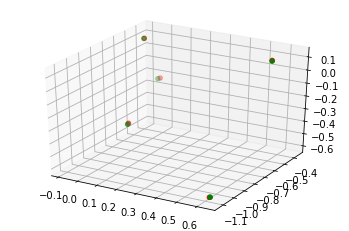

In [13]:
import matplotlib.pyplot as pyp
N2 = 5
X2 = np.random.rand(3,N2)
fig = pyp.figure()
ax = pyp.axes(projection='3d')


# Création d’une matrice orthogonale aléatoire P2
M2 = np.random.rand(3,3)
A2, S2, B2 = la.svd(M2)
P2 = A2

# Création de Y2 par rotation aléatoire de X2
Y2 = 0.01*np.random.rand(3,N2)  + P2@X2
ax.scatter3D(Y2[0,:],Y2[1,:],Y2[2,:], color = 'red')
R2 = recalage_orthogonal(X2,Y2)
ax.scatter3D(np.dot(R2,X2)[0,:], np.dot(R2,X2)[1,:], np.dot(R2,X2)[2,:], color = 'green')

pyp.show()

<font size="4"><b>SVD et compression d’image </b></font>

Une image peut être représentée par une matrice $A$ de taille $m\times n$. La décomposition SVD appliquée
à cette matrice permet d’écrire $A = U \Sigma V^T$ où $\Sigma$ est une matrice diagonale dont le nombre des
éléments diagonaux non-nuls est égal au rang de $A$. Le concept fondamental de la compression des
images en utilisant la décomposition SVD est d’utiliser un rang plus petit pour approximer la matrice
$A$, on parle alors de SVD tronquée.

Écrire une fonction <tt>svd_tronquee</tt> prenant en entrée une matrice $A$ et un entier $k$ strictement inférieur au rang de $A$ et qui renvoie une matrice $B$ de rang $k$ qui est une approximation
d’ordre $k$ de la matrice $A$. Penser à utiliser les bonnes sous parties de $U$, $\Sigma$ et $V$ pour former la matrice $B$.

In [14]:
def svd_tronquee(A,k):
    U,sig,Vt = la.svd(A)
    U2 = U[:,:k]
    sig2 = sig[:k]
    Vt2= Vt[:k,:]
    return U2@np.diag(sig2)@Vt2
    

On va appliquer la SVD tronquée au traitement d'images. On va utiliser la classique image de Lenna suivante (téléchargeable sur la page wikipedia https://en.wikipedia.org/wiki/Lenna)

Pour manipuler des images, une fois que vous avez mis l'image dans le même dossier : 

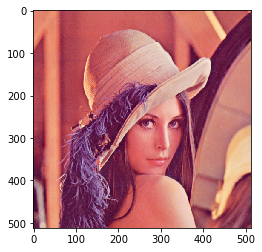

In [17]:
import matplotlib.pyplot as pyp
A = img.imread('Lenna.png') # crée un array
pyp.imshow(A) # affiche un array

Pour avoir une image en noir et blanc : 

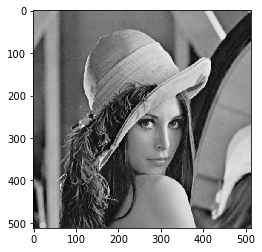

In [18]:
rgb_weights = [0.2989, 0.5870, 0.1140]
B = np.dot(A[...,:3], rgb_weights)
pyp.imshow(B, cmap=pyp.get_cmap("gray"))

Affichez aussi les différentes svd tronquées en fonction du nombre de valeurs tronquées. 

Calculer $\Vert B - C\Vert_2$, où $C$ est la SVD tronquée de $A$. Que pensez vous du résultat?

507
[[0.55177935 0.55177935 0.54966815 ... 0.43501738 0.43324048 0.43583472]
 [0.55177935 0.55177935 0.54966815 ... 0.43501738 0.43324048 0.43583472]
 [0.55177935 0.55177935 0.54966815 ... 0.43501738 0.43324048 0.43583472]
 ...
 [0.29540443 0.29540443 0.31418273 ... 0.25934171 0.25870959 0.26092056]
 [0.29550123 0.29550123 0.31403649 ... 0.26287479 0.26246635 0.26479938]
 [0.29550123 0.29550123 0.31403649 ... 0.26287479 0.26246635 0.26479938]]


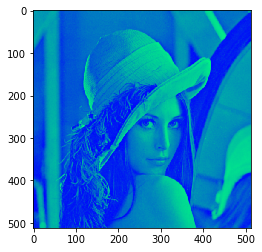

In [19]:
print(la.matrix_rank(B))
C = svd_tronquee(B,10)
print(C)
plt.imshow(B, cmap = plt.get_cmap("winter"))

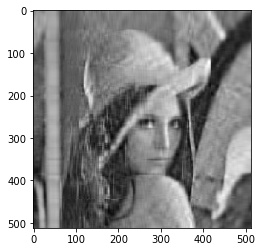

In [21]:
C = svd_tronquee(B,20)
plt.imshow(C, cmap=pyp.get_cmap("gray"))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


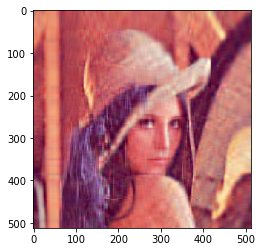

In [22]:
def with_color(A,k):
    R = svd_tronquee(A[:,:,0],k)
    G = svd_tronquee(A[:,:,1],k)
    B = svd_tronquee(A[:,:,2],k)
    b = A.copy()
    b[:,:,0] = R
    b[:,:,1] = G
    b[:,:,2] = B
    return b
colored = with_color(A,20)
plt.imshow(colored)